In [7]:
from __future__ import print_function

# !pip install tensorflow-gpu

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input,Concatenate
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.models import model_from_json

import cv2
import glob
import os
import pickle


#set global parameters
img_rows = 224
img_cols = 224
max_files = -1
read_from_cache = False

Using TensorFlow backend.


In [8]:
!cd ~/sharedfolder/
!git pull

Already up-to-date.


In [9]:
%cd day04/
!ls

[Errno 2] No such file or directory: 'day04/'
/root/sharedfolder/day04
1.JPG	20.JPG	31.JPG	42.JPG	53.JPG
10.JPG	21.JPG	32.JPG	43.JPG	54.JPG
11.JPG	22.JPG	33.JPG	44.JPG	55.JPG
12.JPG	23.JPG	34.JPG	45.JPG	6.JPG
13.JPG	24.JPG	35.JPG	46.JPG	7.JPG
14.JPG	25.JPG	36.JPG	47.JPG	8.JPG
15.JPG	26.JPG	37.JPG	48.JPG	9.JPG
16.JPG	27.JPG	38.JPG	49.JPG	build_gpu.sh
17.JPG	28.JPG	39.JPG	5.JPG	card_files_labels.csv
18.JPG	29.JPG	4.JPG	50.JPG	initial_load_and_exploration_double.ipynb
19.JPG	3.JPG	40.JPG	51.JPG
2.JPG	30.JPG	41.JPG	52.JPG


In [10]:
Path = '/root/sharedfolder/day04/'
filelist = glob.glob(Path)
filelist.sort()
filelist

['/root/sharedfolder/day04/']

In [11]:
def read_image(path,img_rows,img_cols):
    img = cv2.imread(path)
    return cv2.resize(img, (img_cols, img_rows))

def read_train(path,img_rows,img_cols,max_files):
    
    # img_rows & img_cols set the size of the image in the output
    # max files is the maximal number of images to read from each category
    # use max_files=-1 to read all images within the train subfolders
    
    X_train = []
    y_train = []
    counter = 0
    print('Read train images')
    files = glob.glob(path+'*.JPG')
    for fl in files:
        flbase = os.path.basename(fl)
        img = read_image(fl, img_rows, img_cols)
        X_train.append(np.asarray(img))
#             y_train.append(j)
        counter+=1
        if (counter>=max_files)&(max_files>0):
            break
    
    return np.array(X_train)#, np.array(y_train)

def read_test(img_rows,img_cols):
    X_test = []
    ids = []
    print('Read test images')
    path = os.path.join('..', 'input','final_test', '*.jpg')
    files = glob.glob(path)
    for fl in files:
        flbase = os.path.basename(fl)
        img = read_image(fl, img_rows, img_cols)
        X_test.append(np.asarray(img))
        ids.append(fl.split('/')[-1])
    
    return np.array(ids), np.array(X_test)

def cache_data(data, path):
    # this is a helper function used to cache data once it was read and preprocessed
    if os.path.isdir(os.path.dirname(path)):
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
    else:
        print('Directory doesnt exists')
        
def restore_data(path):
    # this is a helper function used to restore cached data
    data = dict()
    if os.path.isfile(path):
        file = open(path, 'rb')
        data = pickle.load(file)
    return data


def save_model(model,filename):
    # this is a helper function used to save a keras NN model architecture and weights
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    open(os.path.join('cache', filename+'_architecture.json'), 'w').write(json_string)
    model.save_weights(os.path.join('cache', filename+'_model_weights.h5'), overwrite=True)

def read_model(filename):
    # this is a helper function used to restore a keras NN model architecture and weights
    model = model_from_json(open(os.path.join('cache', filename+'_architecture.json')).read())
    model.load_weights(os.path.join('cache', filename+'_model_weights.h5'))
    return model


In [12]:
tr_data = read_train(Path,224,224,-1)
y_train = pd.read_csv(Path+'card_files_labels.csv')
from keras.utils.np_utils import to_categorical
ids = y_train.card_file
y_train.drop('card_file',inplace=True,axis=1)
OHE_y_train = (y_train)

Read train images


In [21]:
tr_data.shape

(55, 224, 224, 3)

In [13]:
y_train

,igloo,no entrance,man,snowman,baby bottle,lightning,yellow cheese,skull,carrot,double (hand),...,bird,spider web,cactus,ice cube,ghost,yin yang,sun,clock,lips,apple
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
5,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [14]:
OHE_y_train.shape

(55, 57)

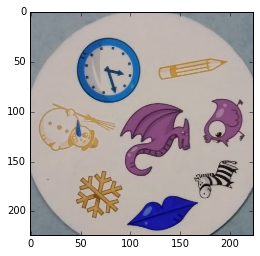

In [15]:

plt.imshow(tr_data[1])

In [25]:
model= Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(57, activation='sigmoid'))
model.summary()
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 223, 223, 16)      208       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 222, 222, 32)      2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 110, 110, 32)      4128      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 16)      2064      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 46656)             0         
__________

In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(factor=0.3)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=0.5,
    shear_range=0.1,
    zoom_range=0.4,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

model.fit_generator(datagen.flow(tr_data, OHE_y_train, batch_size=8),callbacks=[rlrop],
                    validation_data=datagen.flow(tr_data,OHE_y_train),
                    steps_per_epoch=500,validation_steps = 100, epochs=4)

Epoch 1/4
500/500 [==============================] - 44s - loss: 6.7118 - acc: 0.5797 - val_loss: 6.2709 - val_acc: 0.6077
Epoch 2/4
500/500 [==============================] - 44s - loss: 6.2711 - acc: 0.6076 - val_loss: 6.2701 - val_acc: 0.6077
Epoch 3/4
500/500 [==============================] - 43s - loss: 6.0935 - acc: 0.6188 - val_loss: 6.0628 - val_acc: 0.6207
Epoch 4/4
500/500 [==============================] - 44s - loss: 6.0617 - acc: 0.6208 - val_loss: 6.0626 - val_acc: 0.6207


In [16]:
cd /root/sharedfolder/double/single\ images/

/root/sharedfolder/double/single images


In [17]:
ls

ancore.JPG       dolphin.JPG           light bulb.JPG     sol key.JPG
apple.JPG        double (hand).JPG     lightning.JPG      spider web.JPG
baby bottle.JPG  dragon.JPG            lips.JPG           spider.JPG
beatle.JPG       drop.JPG              lock.JPG           sun.JPG
bird.JPG         exclamation mark.JPG  moon.JPG           sunglasses.JPG
bomb.JPG         eye.JPG               night.JPG          target.JPG
bon fire.JPG     flower.JPG            no entrance.JPG    taxi.JPG
cactus.JPG       ghost.JPG             pencil.JPG         tree.JPG
candle.JPG       green leaf.JPG        puppy.JPG          turtle.JPG
carot.JPG        hammer.JPG            question mark.JPG  yellow cheese.JPG
cat.JPG          heart.JPG             red leaf.JPG       yinyang.JPG
clock.JPG        ice cube.JPG          scissors.JPG       zebra.JPG
clown.JPG        igloo.JPG             skull.JPG
color stain.JPG  key.JPG               snow flake.JPG
dinosour.JPG     knight.JPG            snowman.JPG


In [18]:
single_tr_data = read_train('/root/sharedfolder/double/single images/',80,80,-1)

Read train images


In [23]:
sngl_imgs = [x.split('/')[-1].split('.')[0] for x in glob.glob('/root/sharedfolder/double/single images/'+'*.JPG')]
sngl_imgs

['hammer',
 'igloo',
 'sunglasses',
 'turtle',
 'question mark',
 'apple',
 'dinosour',
 'carot',
 'double (hand)',
 'ancore',
 'sol key',
 'ice cube',
 'dragon',
 'clown',
 'ghost',
 'tree',
 'color stain',
 'pencil',
 'exclamation mark',
 'yellow cheese',
 'drop',
 'bird',
 'bon fire',
 'cat',
 'target',
 'spider web',
 'light bulb',
 'eye',
 'scissors',
 'green leaf',
 'lock',
 'key',
 'cactus',
 'taxi',
 'skull',
 'baby bottle',
 'heart',
 'beatle',
 'candle',
 'lightning',
 'no entrance',
 'snow flake',
 'flower',
 'spider',
 'knight',
 'lips',
 'clock',
 'dolphin',
 'sun',
 'snowman',
 'moon',
 'bomb',
 'zebra',
 'yinyang',
 'puppy',
 'night',
 'red leaf']

In [20]:
np.setdiff1d(np.array(y_train.columns),sngl_imgs)

array(['anchor', 'apple', 'baby bottle', 'beetle', 'bird', 'bomb',
       'bonfire', 'bulb', 'cactus', 'candle', 'carrot', 'cat', 'clock',
       'clown', 'color stain', 'dinosaur', 'dolphin', 'double (hand)',
       'dragon', 'drop', 'exclamation mark', 'eye', 'flower', 'ghost',
       'green leaf', 'hammer', 'heart', 'ice cube', 'igloo', 'key',
       'knight', 'lightning', 'lips', 'lock', 'man', 'maple leaf', 'moon',
       'no entrance', 'pencil', 'puppy', 'question mark', 'scissors',
       'skull', 'snow flake', 'snowman', 'sol key', 'spider', 'spider web',
       'sun', 'sunglasses', 'target', 'taxi', 'tree', 'turtle',
       'yellow cheese', 'yin yang', 'zebra'], dtype=object)

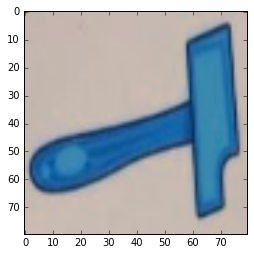

In [49]:
plt.imshow(single_tr_data[0])

In [2]:
from PIL import Image
background = Image.open('/root/sharedfolder/double/gen_imgs/blank.jpg', 'r')
img = Image.open('/root/sharedfolder/double/single images/cat.JPG', 'r')
img_w, img_h = img.size
bg_w, bg_h = background.size
offset = ((bg_w - img_w) / 2, (bg_h - img_h) / 2)
# img = img.rotate(45,resample=Image.NEAREST)
background.paste(img, offset)
background.save('/root/sharedfolder/double/gen_imgs/out.png')

IOError: [Errno 2] No such file or directory: '/root/sharedfolder/double/gen_imgs/blank.JPG'

In [5]:
ls /root/sharedfolder/double/gen_imgs/ 

blank.jpg  out.png
